In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Intensity Transformations and Spatial Filtering

### Expression

$$g(x, y)=T[f(x, y)]$$

f(x, y): an input image
g(x, y): the output image
T: an operator on f defined over a neighborhood of point (x, y)

T can be applied to the poxels of **a single image** or to the pixels of **a set of images**

### Intesnsity transformation function(point processing techniques)
The smallest possible neighborhood is of size In this case, g depends only on the value of f at a single point (x, y)

$$ s = T(r) $$



* Image negatives
* Log Transformations
* Gamma Transformations
* Piecewise Linear Transformations


### Three basic types of Intensity Transformations

* Linear
    * Negative
    * Linear
    * Poecewise Linear
* Logarithmic
    * log
    * inverse-log
* power-law
    * $n$ th power
    * $n$ th root

### Image Negatives

function:

$$s = L-1 -r,  r\in [0, L-1]$$

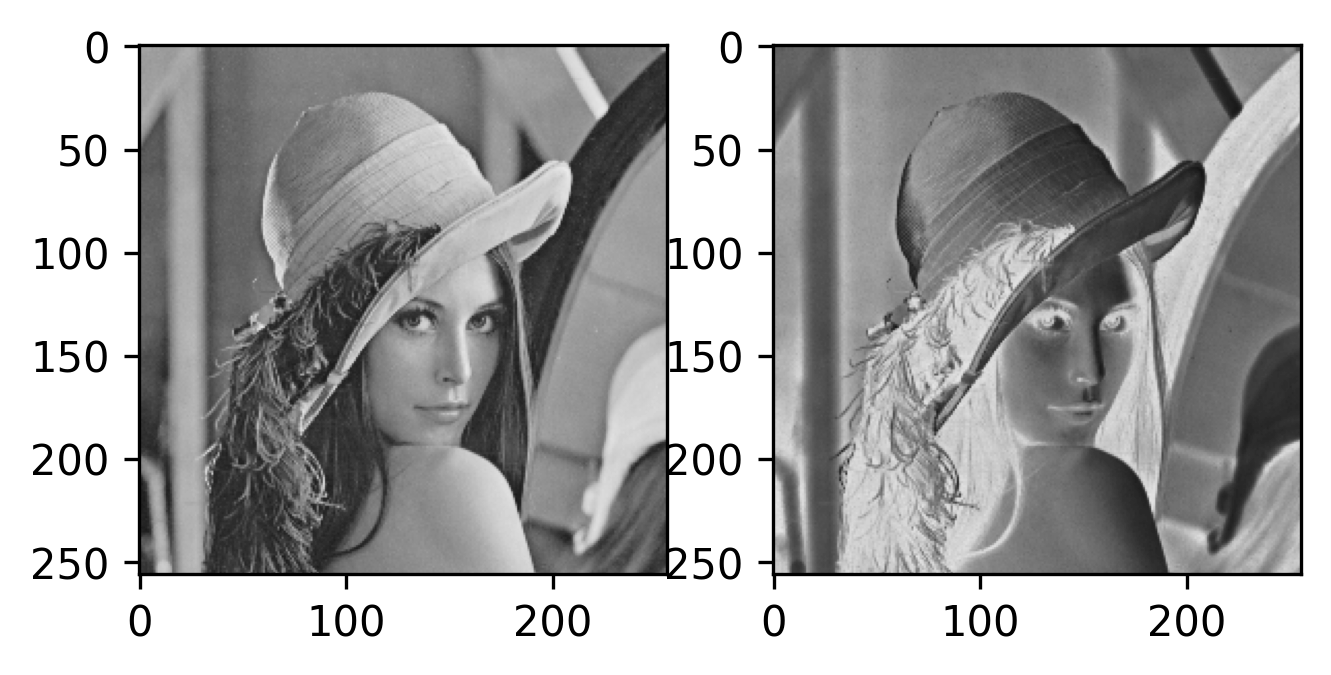

In [16]:
# image Negatives
# range: [0, 255]

lena_image = cv2.imread("./images/lena_gray_256.tif", 0)
lena_image_negative = 255 - lena_image

plt.figure(figsize=(5, 5), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(lena_image, cmap="gray", vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(lena_image_negative, cmap="gray", vmin=0, vmax=255)
plt.show()

### Log Transformations

function:

$$s=c\log(1+r), r \in [0, L-1]$$

where $c$ is a constant

this transformation maps a narrow range of low intensity values in the input into a wider range of output levels and maps a wider range of high intensity values in the input into a narrow range of output levels

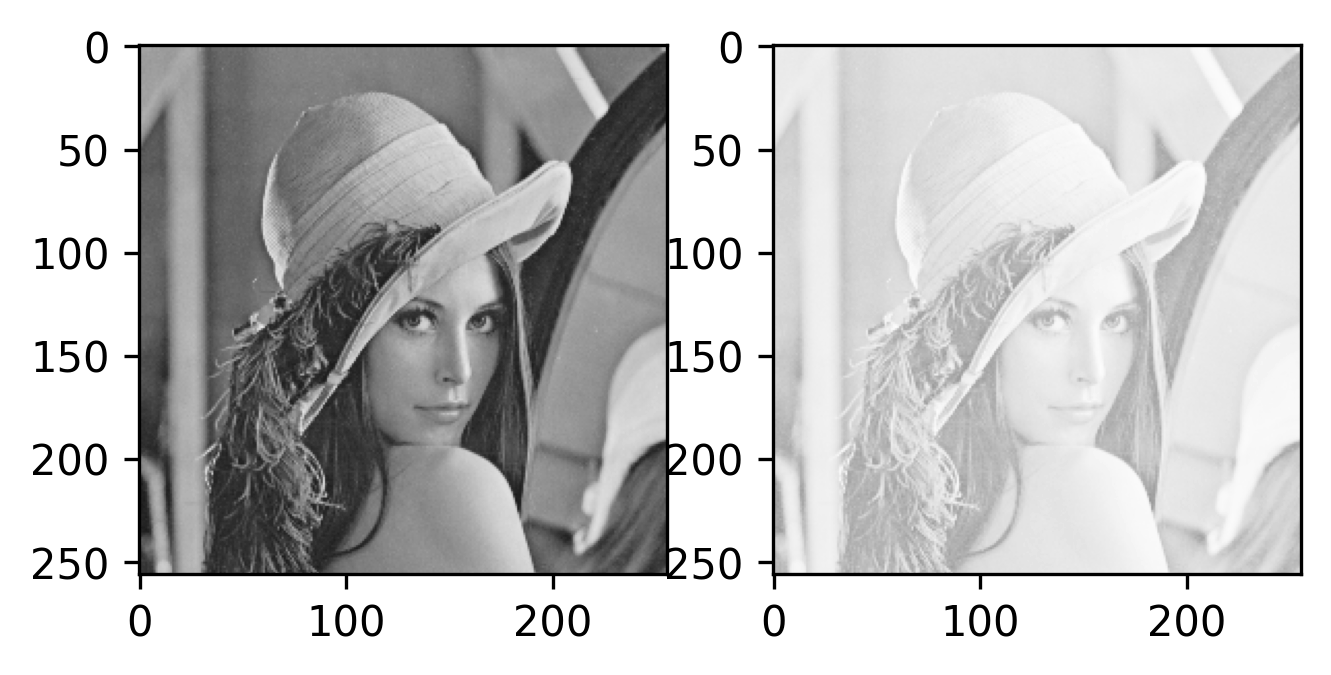

In [21]:
# image Log
# input values range: [0, 255]
c = 256/np.log(256)

lena_image = cv2.imread("./images/lena_gray_256.tif", 0)
lena_image_log = c * np.log(np.array(lena_image).astype(np.int32) + 1)

plt.figure(figsize=(5, 5), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(lena_image, cmap="gray", vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(lena_image_log, cmap="gray", vmin=0, vmax=255)
plt.show()

### Power-Law Transformations(Gamma)

function:

$$s = cr^\gamma, r \in [0, L-1]$$

c and $\gamma$ are positive constants

or:

$$s = c(r + \epsilon)^\gamma$$

c, $\gamma$ and $\epsilon$ are positive constants(a measurable output when the input is zero)

* $\gamma < 1$

map a narrow range of dark input values into a wider range of output values, with opposite being true for higher values of input levels

* $\gamma = 1$

Power-Law transformations reduces to the identity transformation

* $\gamma > 1$

map a wider range of dark input values into a narrow range of output values, with opposite being true for higher values of input levels

![gamma equation](https://raw.githubusercontent.com/koolo233/DigitalImageProcessing_Python/main/repository%20images/gamma_transformation.jpg)


In [28]:
def change_range(input_array, min_output, max_output, min_input=None, max_input=None):

    if min_input is not None and max_input is not None:
        input_array = np.clip(input_array, min_input, max_input)
    else:
        min_input = np.min(input_array)
        max_input = np.max(input_array)
    
    output_array = (input_array - min_input)/(max_input - min_input)
    output_array = (output_array + min_output) * (max_output - min_output)
    return output_array

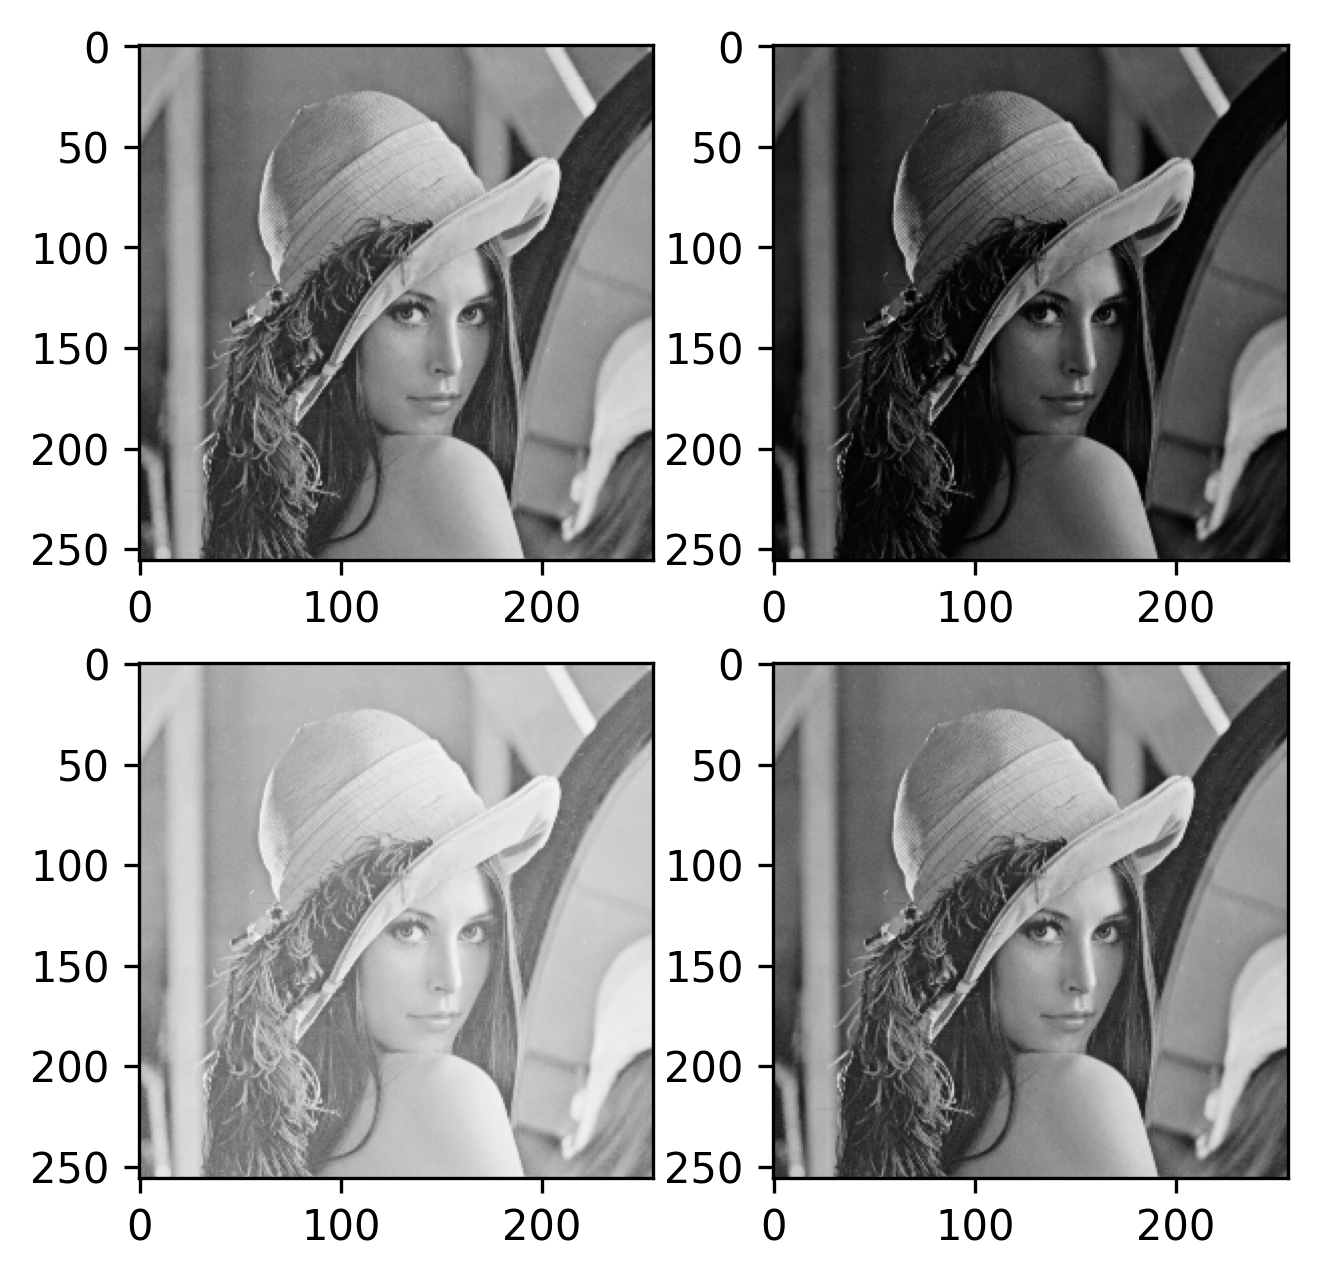

In [41]:
# image Log
# input values range: [0, 255]
c = 1

lena_image = cv2.imread("./images/lena_gray_256.tif", 0)
lena_image = np.array(lena_image).astype(np.float32)/255
lena_image_25 = c * np.power(lena_image, 2.2)
lena_image_gamma_corrected = c * np.power(lena_image, 1/2.2)
lena_image_gamma_corrected_view = c * np.power(lena_image_gamma_corrected, 2.2)

plt.figure(figsize=(5, 5), dpi=300)
plt.subplot(2, 2, 1)
plt.imshow(lena_image, cmap="gray", vmin=0, vmax=1)
plt.subplot(2, 2, 2)
plt.imshow(lena_image_25, cmap="gray", vmin=0, vmax=1)
plt.subplot(2, 2, 3)
plt.imshow(lena_image_gamma_corrected, cmap="gray", vmin=0, vmax=1)
plt.subplot(2, 2, 4)
plt.imshow(lena_image_gamma_corrected_view, cmap="gray", vmin=0, vmax=1)
plt.show()

### Piecewise Linear Transformation

* Contrast Stretching
* Intensity-Level Slicing
* Bit-Plane Slicing

### Histogram Processing

* Histogram Equalization
* Histogram Matching
* Exact Histogram Matching
